In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

## Processing Data

In [8]:
for image in os.listdir('../Downloads/output'):
    label = image[:4]
    image_path = 'output/' + image
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

FileNotFoundError: [Errno 2] No such file or directory: '../Downloads/output'

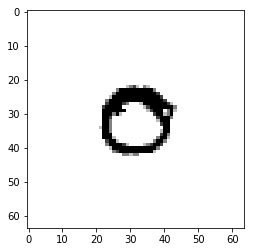

In [66]:
# test the suitable image size to use, 64 seems reasonable
SIZE = 64
new_array = cv2.resize(img_array, (SIZE, SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [67]:
training_data = []

def create_training_data():
    for image in os.listdir('output'):
        label = int(image[:4])
        image_path = 'output/' + image
        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (SIZE, SIZE)) # resize
        training_data.append([new_array, label])
        
    
    
create_training_data()

In [68]:
# check dataset, all labels are random
for sample in training_data[:10]:
    print(sample[1])

31
16
28
50
79
3
61
26
71
64


In [69]:
X = []
y = []

In [70]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, SIZE, SIZE, 1) 
X= X/255.0

In [71]:
type(y[0])

int

## Building Model

In [72]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [83]:

model = Sequential()
model.add( Conv2D(64, (3,3), input_shape=X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# tf.keras.layers.Dense(128, activation=tf.nn.relu),
# tf.keras.layers.Dense(100,  activation=tf.nn.softmax)
model.add(  Conv2D(64, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(100))
model.add(Activation("sigmoid"))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, validation_split=0.1,epochs=5)


Train on 32157 samples, validate on 3574 samples
Epoch 1/5
32157/32157 [==============================] - 195s 6ms/sample - loss: 4.0784 - accuracy: 0.0674 - val_loss: 3.6236 - val_accuracy: 0.1136
Epoch 2/5
32157/32157 [==============================] - 173s 5ms/sample - loss: 3.4127 - accuracy: 0.1542 - val_loss: 3.3567 - val_accuracy: 0.1620
Epoch 3/5
32157/32157 [==============================] - 176s 5ms/sample - loss: 3.1056 - accuracy: 0.2167 - val_loss: 3.2257 - val_accuracy: 0.1919
Epoch 4/5
32157/32157 [==============================] - 169s 5ms/sample - loss: 2.8650 - accuracy: 0.2658 - val_loss: 3.0909 - val_accuracy: 0.2194
Epoch 5/5
32157/32157 [==============================] - 169s 5ms/sample - loss: 2.6798 - accuracy: 0.3085 - val_loss: 3.0739 - val_accuracy: 0.2286
